## Aula 2 - Atividade 1

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Carregar a base de dados
file_path = 'C:/Users/igorl/Documents/Projeto integrador V/amazon_alexa.tsv'
base = pd.read_csv(file_path, sep='\t')

In [12]:
# Quantos registros possuem na base de dados e quantos atributos?
print("Shape da base de dados (Registros, Atributos):", base.shape)

# Gerar a estatística para os atributos numéricos
print("\nEstatísticas dos atributos numéricos:")
print(base.describe())

Shape da base de dados (Registros, Atributos): (3150, 5)

Estatísticas dos atributos numéricos:
            rating     feedback
count  3150.000000  3150.000000
mean      4.463175     0.918413
std       1.068506     0.273778
min       1.000000     0.000000
25%       4.000000     1.000000
50%       5.000000     1.000000
75%       5.000000     1.000000
max       5.000000     1.000000


rating: A média das avaliações é 4.46, indicando que, em geral, as avaliações são bastante positivas. O desvio padrão de 1.07 sugere que há alguma variação nas avaliações, mas a maioria está concentrada perto da nota máxima de 5. A mediana e o percentil de 75 mostram que muitas avaliações são 5, o que reforça a tendência de avaliações elevadas.

feedback: A média do feedback é 0.92, e o valor máximo é 1.00, o que indica que o feedback é frequentemente positivo (ou seja, 1). O desvio padrão é baixo, o que sugere que há pouca variação no feedback, com a maioria dos valores sendo 1.

Esses dados fornecem uma visão geral de que a maioria das avaliações e feedbacks são altamente positivos, com a maioria dos registros recebendo as melhores classificações e feedbacks possíveis.

In [18]:
# Observar os primeiros registros
print("\nPrimeiros registros da base de dados:")
print(base.head())


Primeiros registros da base de dados:
   rating       date         variation  \
0       5  31-Jul-18  Charcoal Fabric    
1       5  31-Jul-18  Charcoal Fabric    
2       4  31-Jul-18    Walnut Finish    
3       5  31-Jul-18  Charcoal Fabric    
4       5  31-Jul-18  Charcoal Fabric    

                                    verified_reviews  feedback  
0                                      Love my Echo!         1  
1                                          Loved it!         1  
2  Sometimes while playing a game, you can answer...         1  
3  I have had a lot of fun with this thing. My 4 ...         1  
4                                              Music         1  


rating: As avaliações são majoritariamente 5, com algumas avaliações de 4, o que confirma que a maioria das avaliações é bastante positiva.

date: Todas as entradas nos primeiros registros são do mesmo dia, 31-Jul-18. Isso pode indicar que os dados foram coletados em um período específico.

variation: As variações dos produtos incluem "Charcoal Fabric" e "Walnut Finish", mostrando a diversidade de opções disponíveis.

verified_reviews: As revisões variam de elogios diretos a descrições mais detalhadas sobre o uso dos produtos. A maioria das revisões parece ser muito positiva.

feedback: Todos os valores de feedback são 1, indicando uma resposta positiva uniforme.

Esses registros fornecem uma visão geral de como as avaliações e feedbacks são altamente positivos, e os comentários refletem uma alta satisfação com o produto.

In [20]:
# Visualizar algumas informações do banco de dados
print("\nInformações gerais da base de dados:")
print(base.info())


Informações gerais da base de dados:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3149 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB
None


Informações Gerais da Base de Dados:

Número de Entradas: 3150
Número de Colunas: 5
Detalhes das Colunas:

rating
Tipo: int64
Valores Não Nulos: 3150
Descrição: Avaliação do produto, variando de 1 a 5.

date
Tipo: object (provavelmente datas como strings)
Valores Não Nulos: 3150
Descrição: Data da avaliação.

variation
Tipo: object
Valores Não Nulos: 3150
Descrição: Variação do produto (ex.: tipo de acabamento).

verified_reviews
Tipo: object
Valores Não Nulos: 3149
Descrição: Texto das avaliações dos usuários. Há um valor nulo.

feedback
Tipo: int64
Valores Não Nulos: 3150
Descrição: Feedback positivo (1) ou negativo (0).

Informações Adicionais:
Tipo de Dados: A base contém tipos de dados int64 (para avaliações e feedback) e object (para datas, variações e textos das avaliações).
Uso de Memória: Aproximadamente 123.2 KB.

Observação:
A coluna verified_reviews possui um valor nulo. Isso pode precisar de tratamento, como preenchimento ou exclusão de registros.

In [22]:
# Entender cada atributo da base de dados
print("\nNomes dos atributos:")
print(base.columns)


Nomes dos atributos:
Index(['rating', 'date', 'variation', 'verified_reviews', 'feedback'], dtype='object')


In [34]:
# Verificar valores nulos e exibir a soma dos valores nulos por coluna
# print(sns.heatmap(base.isnull(), cbar=False))
print(base.isnull().sum())

rating              0
date                0
variation           0
verified_reviews    1
feedback            0
dtype: int64


Valores não Nulos: A maioria das colunas está completa, com exceção da coluna verified_reviews, que possui um valor nulo.

O que eu faria: preencheria o valor nulo em verified_reviews com uma string padrão (por exemplo, "Sem Comentário") ou removeria a linha correspondente.

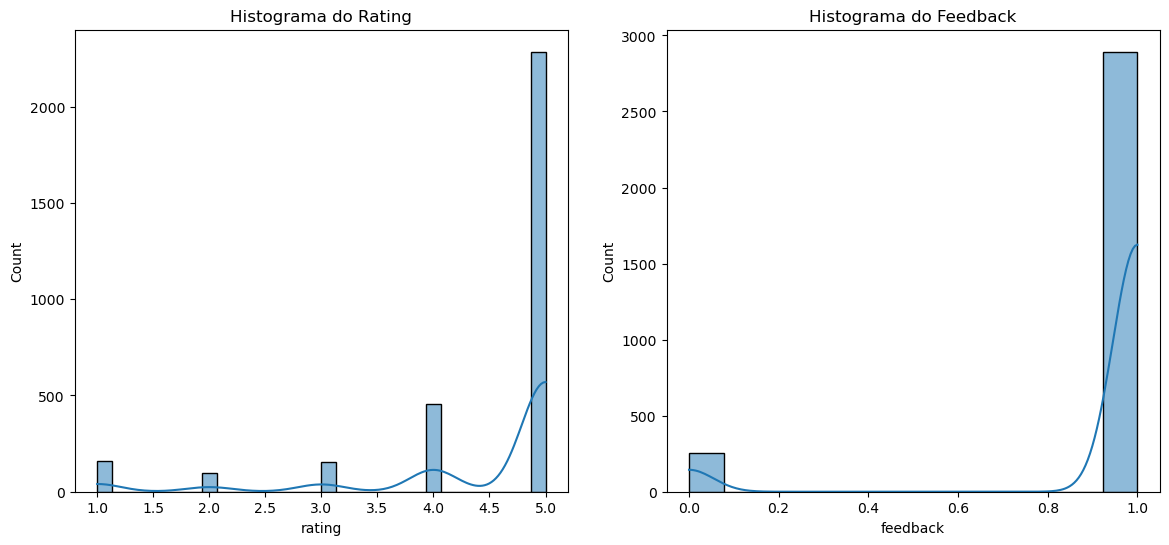

In [38]:
# Gerar histogramas para os atributos numéricos (rating e feedback)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(base['rating'], kde=True)
plt.title('Histograma do Rating')

plt.subplot(1, 2, 2)
sns.histplot(base['feedback'], kde=True)
plt.title('Histograma do Feedback')

plt.show()

A maioria das notas (rating) foram boas, o que explica os valores 1 em feedback serem maiores também (levando em consideração que 1 representa um bom feedback e 0 um feedback ruim) e vice-versa.

In [46]:
# Verificar o tamanho dos textos das revisões, lidando com valores nulos
base['review_length'] = base['verified_reviews'].fillna('').apply(len)

print("\nTamanho dos textos das revisões:")
print(base['review_length'].describe())


Tamanho dos textos das revisões:
count    3150.000000
mean      132.048254
std       182.100859
min         0.000000
25%        30.000000
50%        74.000000
75%       165.000000
max      2851.000000
Name: review_length, dtype: float64


Tamanho dos Textos das Revisões:

Número de Registros: 3150
Média do Tamanho: 132.05 caracteres
Desvio Padrão: 182.10 caracteres
Mínimo: 0 caracteres
25º Percentil: 30 caracteres
Mediana (50º Percentil): 74 caracteres
75º Percentil: 165 caracteres
Máximo: 2851 caracteres
Interpretação:

Média e Desvio Padrão: A média do tamanho dos textos das revisões é de aproximadamente 132 caracteres, mas há uma grande variação, indicada pelo desvio padrão de 182.10 caracteres. Isso sugere que muitos textos são significativamente mais longos do que a média.

Distribuição dos Tamanhos:

O 25º percentil mostra que 25% das revisões têm 30 caracteres ou menos, enquanto o 75º percentil indica que 25% das revisões têm 165 caracteres ou mais.
A mediana de 74 caracteres é uma boa indicação do tamanho típico dos textos, já que a mediana não é afetada por valores extremos.
Máximo: O tamanho máximo de 2851 caracteres indica que algumas revisões podem ser extremamente detalhadas ou longas, o que pode ser útil ou precisar de filtragem dependendo da análise que você está realizando.

In [66]:
# Criar um dataframe com os reviews positivos
df_positivos = base[base['rating'] > 3]
print("\nQuantidade de reviews positivas:", df_positivos.shape[0])

# Criar um dataframe com os reviews negativos
df_negativos = base[base['rating'] <= 3]
print("Quantidade de reviews negativas:", df_negativos.shape[0])


Quantidade de reviews positivas: 2741
Quantidade de reviews negativas: 409


In [50]:
# De modo geral, quando a review é negativa, quantos caracteres as pessoas escrevem? E positivo?
print("\nMédia de caracteres em reviews positivas:", df_positivos['review_length'].mean())
print("Média de caracteres em reviews negativas:", df_negativos['review_length'].mean())


Média de caracteres em reviews positivas: 120.07661437431594
Média de caracteres em reviews negativas: 212.27872860635696


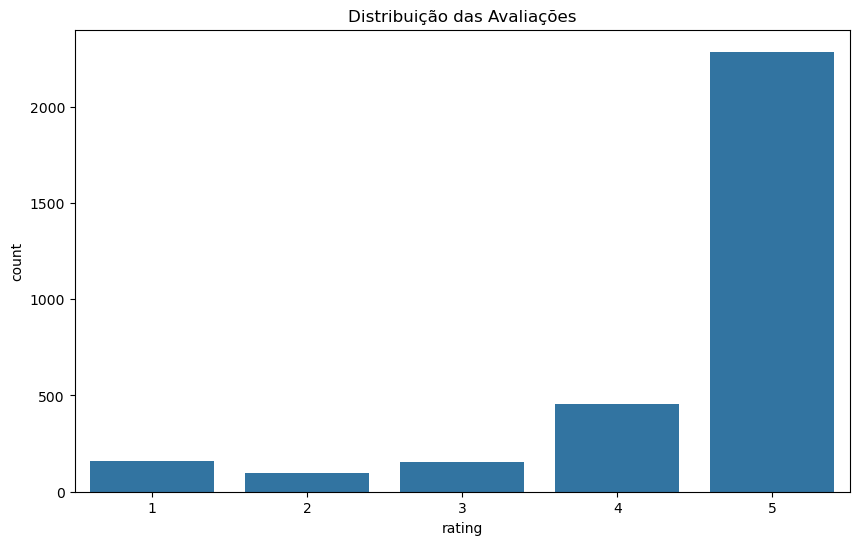

In [52]:
# Gerar gráficos no seaborn para interpretação dos dados (countplot)
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=base)
plt.title('Distribuição das Avaliações')
plt.show()

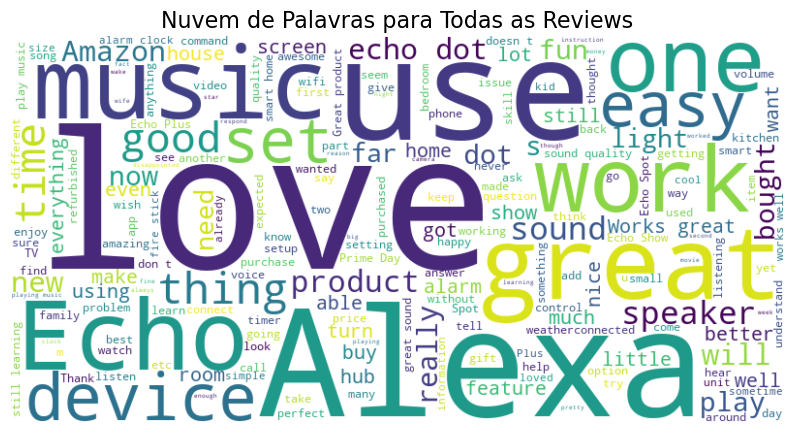

In [58]:
def gerar_nuvem_palavras(texto, titulo):
    # Garantir que todos os valores sejam strings e remover valores nulos
    texto = texto.dropna().astype(str)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(texto))
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(titulo, fontsize=16)
    plt.show()

# Nuvem de palavras para todas as reviews
gerar_nuvem_palavras(base['verified_reviews'], 'Nuvem de Palavras para Todas as Reviews')

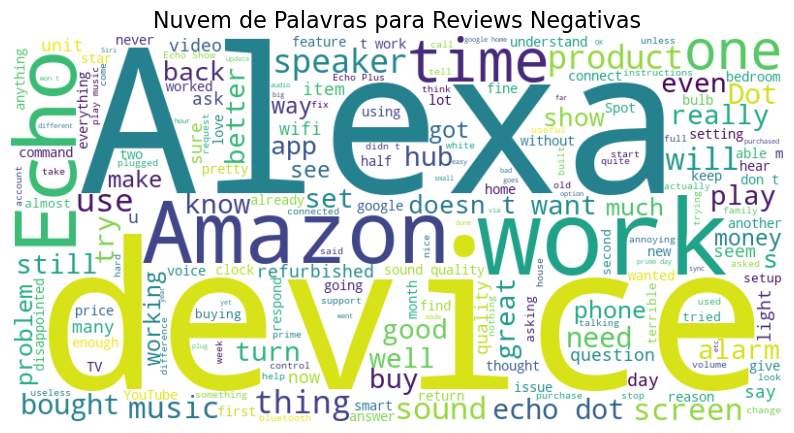

In [60]:
# Nuvem de palavras para as reviews negativas
gerar_nuvem_palavras(df_negativos['verified_reviews'], 'Nuvem de Palavras para Reviews Negativas')

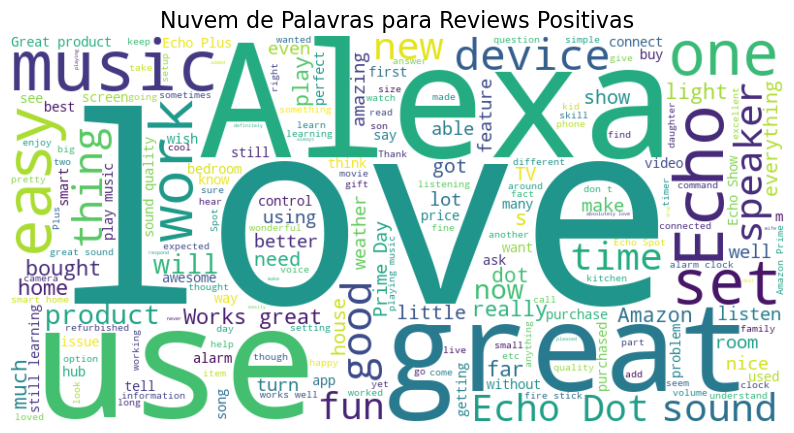

In [62]:
# Nuvem de palavras para as reviews positivas
gerar_nuvem_palavras(df_positivos['verified_reviews'], 'Nuvem de Palavras para Reviews Positivas')

### Aula de 31/07 - Análise de Sentimento

In [3]:
!pip install vaderSentiment

   ---------------------------------------- 0.0/126.0 kB ? eta -:--:--
   ------ -------------------------------- 20.5/126.0 kB 330.3 kB/s eta 0:00:01
   ------ -------------------------------- 20.5/126.0 kB 330.3 kB/s eta 0:00:01
   --------------- ----------------------- 51.2/126.0 kB 375.8 kB/s eta 0:00:01
   -------------------------------------  122.9/126.0 kB 654.9 kB/s eta 0:00:01
   -------------------------------------- 126.0/126.0 kB 530.8 kB/s eta 0:00:00


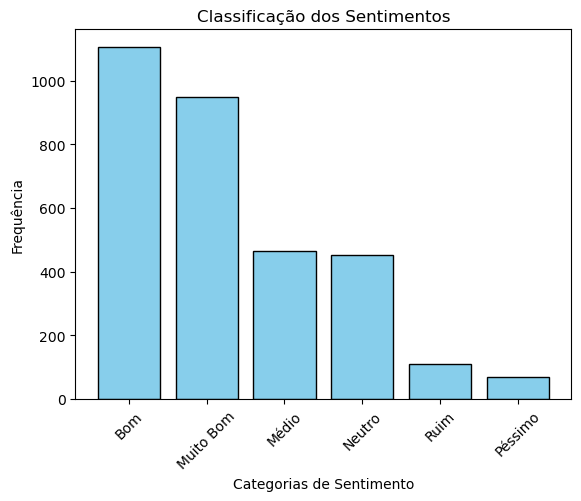

In [9]:
# Importando bibliotecas necessárias
import pandas as pd
from textblob import TextBlob

# Carregando o arquivo .tsv (substitua 'caminho_do_arquivo.tsv' pelo caminho correto)
df = pd.read_csv('C:/Users/danie/Downloads/Projeto Integrador - 5/Base de Dados - Relações Públicas/amazon_alexa.tsv', sep='\t')

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Inicializando o analisador VADER
analyzer = SentimentIntensityAnalyzer()

# Função para calcular o sentimento usando VADER
def get_vader_sentiment(text):
    if isinstance(text, str):
        sentiment_score = analyzer.polarity_scores(text)
        return sentiment_score['compound']  # Usando a pontuação composta
    else:
        return None

# Aplicando o novo método de sentimento na coluna 'verified_reviews'
df['sentiment'] = df['verified_reviews'].apply(get_vader_sentiment)

# Função para classificar os sentimentos
def categorize_sentiment(polarity):
    if polarity >= 0.8:
        return 'Muito Bom'
    elif 0.5 <= polarity < 0.8:
        return 'Bom'
    elif 0.2 <= polarity < 0.5:
        return 'Médio'
    elif -0.2 < polarity < 0.2:
        return 'Neutro'
    elif -0.5 <= polarity <= -0.2:
        return 'Ruim'
    else:
        return 'Péssimo'

# Aplicando a classificação
df['sentiment_category'] = df['sentiment'].apply(categorize_sentiment)

# Contagem das categorias
category_counts = df['sentiment_category'].value_counts()

# Criando o histograma
plt.bar(category_counts.index, category_counts.values, color='skyblue', edgecolor='black')
plt.title('Classificação dos Sentimentos')
plt.xlabel('Categorias de Sentimento')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.show()

####################################################################################################################################

#### Visualizar a distribuição dos sentimentos:

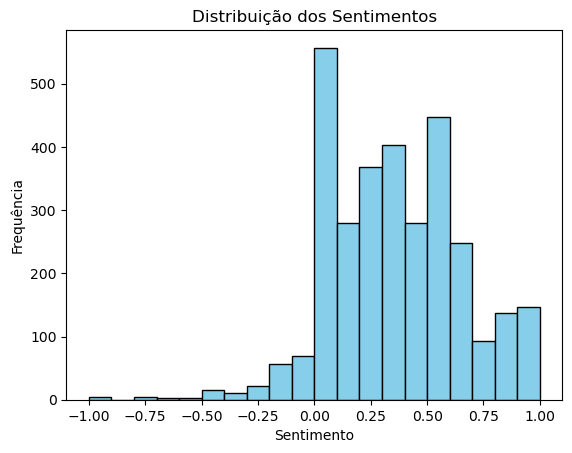

In [17]:
import matplotlib.pyplot as plt

# Criando um histograma para a distribuição de sentimento
plt.hist(df['sentiment'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribuição dos Sentimentos')
plt.xlabel('Sentimento')
plt.ylabel('Frequência')
plt.show()

#### Classificar sentimentos em categorias: 

In [20]:
# Classificando os sentimentos
def categorize_sentiment(polarity):
    if polarity > 0:
        return 'Positivo'
    elif polarity < 0:
        return 'Negativo'
    else:
        return 'Neutro'

# Aplicando a classificação
df['sentiment_category'] = df['sentiment'].apply(categorize_sentiment)

# Exibindo a contagem de cada categoria
print(df['sentiment_category'].value_counts())

sentiment_category
Positivo    2565
Neutro       396
Negativo     189
Name: count, dtype: int64


#### Histograma com as classificações muito bom, bom, médio, neutro, ruim ou péssimo

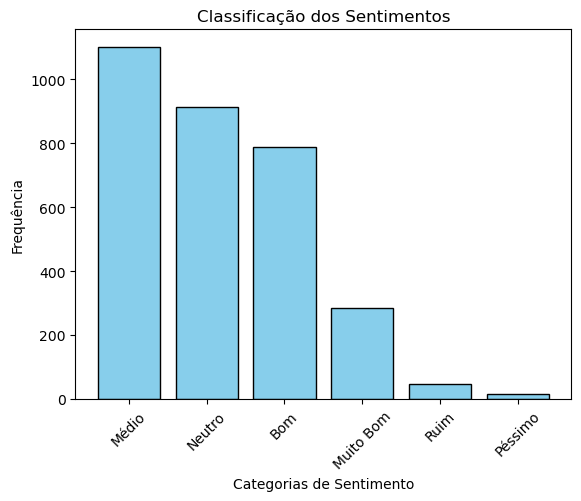

In [22]:
import matplotlib.pyplot as plt

# Função para classificar os sentimentos
def categorize_sentiment(polarity):
    if polarity >= 0.8:
        return 'Muito Bom'
    elif 0.5 <= polarity < 0.8:
        return 'Bom'
    elif 0.2 <= polarity < 0.5:
        return 'Médio'
    elif -0.2 < polarity < 0.2:
        return 'Neutro'
    elif -0.5 <= polarity <= -0.2:
        return 'Ruim'
    else:
        return 'Péssimo'

# Aplicando a classificação
df['sentiment_category'] = df['sentiment'].apply(categorize_sentiment)

# Contagem das categorias
category_counts = df['sentiment_category'].value_counts()

# Criando o histograma
plt.bar(category_counts.index, category_counts.values, color='skyblue', edgecolor='black')
plt.title('Classificação dos Sentimentos')
plt.xlabel('Categorias de Sentimento')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.show()